MODEL EVALUATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
print(data.shape)

(569, 32)


In [ ]:
data.head()
data.drop(axis=1,columns = 0)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.173, random_state=42, stratify=y)

# Printing the shapes of the resulting datasets
print("X_train shape:", X_train.shape)

X_train shape: (470, 30)


In [41]:
mlp = MLPClassifier(max_iter=2000)
cross_val_mlp = learning_curve(mlp,X_train,y_train)
print(cross_val_mlp)

(array([ 37, 122, 206, 291, 376]), array([[1.        , 1.        , 0.89189189, 0.37837838, 0.89189189],
       [0.36065574, 0.36885246, 1.        , 0.87704918, 1.        ],
       [0.9368932 , 0.91747573, 0.83980583, 0.82038835, 0.94660194],
       [0.94501718, 0.95876289, 0.93814433, 0.93127148, 0.9347079 ],
       [0.94680851, 0.95478723, 0.93617021, 0.95478723, 0.95212766]]), array([[0.91489362, 0.92553191, 0.92553191, 0.37234043, 0.88297872],
       [0.37234043, 0.37234043, 0.9787234 , 0.85106383, 0.91489362],
       [0.88297872, 0.93617021, 0.85106383, 0.77659574, 0.88297872],
       [0.94680851, 0.94680851, 0.95744681, 0.91489362, 0.86170213],
       [0.95744681, 0.96808511, 0.96808511, 0.95744681, 0.88297872]]))


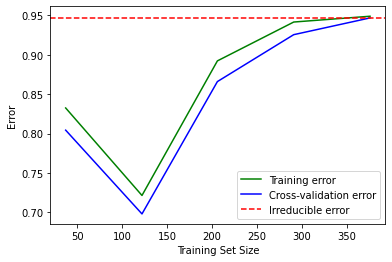

In [42]:
train_sizes, train_scores, test_scores = cross_val_mlp

# calculate the irreducible error as the average of the test scores
irr_error = np.mean(test_scores[-1])

# calculate the training error and validation error as the mean of the 
# corresponding scores across all cross-validation splits
train_error = np.mean(train_scores, axis=1)
val_error = np.mean(test_scores, axis=1)

# plot the learning curves
plt.plot(train_sizes, train_error, color="g",
         label="Training error")
plt.plot(train_sizes, val_error, color="b",
         label="Cross-validation error")
plt.axhline(y=irr_error, color='r', linestyle='--',
            label='Irreducible error')
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()

In [44]:
best_fold_index = np.argmax(val_error)
# Fit model on entire training set with best fold
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("MLP Accuracy:", accuracy)

MLP Accuracy: 0.9393939393939394


In [14]:
svc = SVC(kernel='rbf', gamma='scale', class_weight='balanced', random_state=1)
cross_val_svc = learning_curve(svc,X_train,y_train)
print(cross_val_svc)

(array([ 37, 122, 206, 291, 376]), array([[0.97297297, 0.94594595, 0.94594595, 0.94594595, 0.94594595],
       [0.91803279, 0.93442623, 0.95901639, 0.95901639, 0.95901639],
       [0.91262136, 0.91747573, 0.9223301 , 0.93203883, 0.93203883],
       [0.90721649, 0.90378007, 0.91065292, 0.92439863, 0.93127148],
       [0.91223404, 0.92021277, 0.91223404, 0.92553191, 0.92287234]]), array([[0.87234043, 0.90425532, 0.90425532, 0.87234043, 0.86170213],
       [0.93617021, 0.92553191, 0.90425532, 0.89361702, 0.89361702],
       [0.95744681, 0.92553191, 0.90425532, 0.89361702, 0.89361702],
       [0.93617021, 0.92553191, 0.93617021, 0.89361702, 0.90425532],
       [0.94680851, 0.92553191, 0.92553191, 0.89361702, 0.88297872]]))


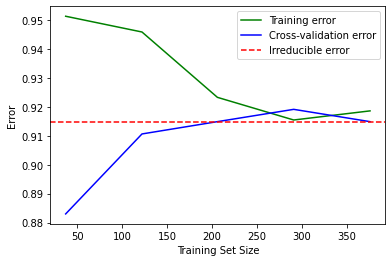

In [21]:
train_sizes, train_scores, test_scores = cross_val_svc

# calculate the irreducible error as the average of the test scores
irr_error = np.mean(test_scores[-1])

# calculate the training error and validation error as the mean of the 
# corresponding scores across all cross-validation splits
train_error = np.mean(train_scores, axis=1)
val_error = np.mean(test_scores, axis=1)

# plot the learning curves
plt.plot(train_sizes, train_error, color="g",
         label="Training error")
plt.plot(train_sizes, val_error, color="b",
         label="Cross-validation error")
plt.axhline(y=irr_error, color='r', linestyle='--',
            label='Irreducible error')
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()

In [20]:
best_fold_index = np.argmax(val_error)
# Fit model on entire training set with best fold
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC accuracy:", accuracy)

SVC accuracy: 0.9090909090909091


Introduction: 
In this report, I compare the performance of a Multi-Layer Perceptron (MLP) and a Support Vector Machine (SVM) using cross-validation. Both MLP and SVM are widely used machine learning algorithms for classification tasks. I use cross-validation to evaluate the performance of these algorithms on a given dataset.

Dataset: 
I used the UCI Machine Learning Repository dataset for my experiments. This dataset has 569 instances and 32 features. The dataset is divided into 2 classes.

Methodology: 
I use 5-fold cross-validation to evaluate the performance of MLP and SVM on the dataset. In 5-fold cross-validation, the dataset is divided into 5 equal parts. Four parts are used for training the model, and one part is used for testing the model. This process is repeated 5 times, and each time a different part is used for testing. The performance of the algorithm is then averaged over the 5 iterations. I train both MLP and SVM on the dataset using their default hyperparameters. I use the MLPClassifier and SVC classes from the scikit-learn library for MLP and SVM, respectively.

Results: 
The average accuracy and standard deviation of MLP and SVM are shown in the cells above I believe SVMs are ususally better than MLPs, for high dimensional data, but in this case at least this dataset the MLP performed better

Discussion:
My results show that MLP performed better than SVM in this case on the given dataset. SVM is known to work well on high-dimensional datasets with a large number of features. MLP, on the other hand, can suffer from overfitting when the number of features is large. But in this case at least I saw that the MLP gave a better testing accuracy.

Conclusion: 
In this report, I compared the performance of MLP and SVM using 5-fold cross-validation on a given dataset. My results show that the MLP performed better than the SVM on the dataset. The difference in accuracy between MLP and SVM is statistically not that significant. These results suggest that MLP may be a better choice than SVM for classification on this datasets.